# Case-1
*Zaitcev Nikita*

*Trukhliaev Eduard*

*Diresh Shrestha*

*20.01.2020*

*Helsinki Metropolia University of Applied Sciences*

### The task is  to read and preprocess the data,  create and train a dense neural network to predict to classify the presence of heart disease

### The main objectives are to:

 - learn to read data from external sources using Pandas’ read_csv-function
 - use Keras’ neural networks to make an expert system to support in diagnostic decision making 
 - learn to test model architectures (number of layers, number of units, activation functions), solver optimizers and training settings (epochs, batch sizes, validation splits)
 - use Matplotlib’s visualization tools to make graphical presentations of the training and validation results
 - learn to document the results clearly and in an easily readable format

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


### This database describes the contents of the heart-disease directory
*This is a file concerning heart disease diagnosis.
All attributes are numeric-valued. There are a total of 6 missing values marked '?', which are then replaced by zeroes. 
The data was collected from the 
Cleveland Clinic Foundation.*
   

In [2]:
filename = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(filename,
                index_col = None,
                header = None,
                na_values = '?')
df.fillna(0, inplace = True)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


The following cell shows the descriptive statistics of the dataset.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.702970,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.971038,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


The data is then preprocessed by using Scikit-Learn's Standard Scaler function

In [4]:
scalar_d = preprocessing.StandardScaler()
scalar_df = pd.DataFrame(scalar_d.fit_transform(df))

Now we seperate the data into the input features and labels. The input features are present in columns 1 to 12 and the labels are in column 13. Furthermore, the original labels are on a scale from 0 to 4 but since we're doing a binary classification, anything above 0 we set to 1 meaning 0 denotes healthy while 1 denotes unhealthy

In [5]:
data = np.asarray(scalar_df.loc[:,0:12])
labels = np.asarray(1.0*(scalar_df.loc[:, 13] > 0))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1st Experiment
# OverTrained Network
*For the first network, we picked a architecture with numerous hidden layers as well as huge number of neurons. This architecutre is likely to overfit.*

In [7]:
model = Sequential()
model.add(Dense(256, input_dim=13, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 47,361
Trainable params: 47,361
Non-trainable params: 0
____________________________________________________

*We used 32 as our batch size and trained on 100 epochs. 227 observations were used for training and 76 for validation.*

In [8]:
h1 = model.fit(data,labels, batch_size = 32 , epochs= 100, validation_split = 0.25)

Train on 227 samples, validate on 76 samples
Epoch 1/100
227/227 [==============================] - 1s 6ms/sample - loss: 0.6164 - accuracy: 0.6564 - val_loss: 0.5550 - val_accuracy: 0.7632
Epoch 2/100
227/227 [==============================] - 0s 246us/sample - loss: 0.4379 - accuracy: 0.8678 - val_loss: 0.4625 - val_accuracy: 0.8158
Epoch 3/100
227/227 [==============================] - 0s 224us/sample - loss: 0.3523 - accuracy: 0.8722 - val_loss: 0.4903 - val_accuracy: 0.7500
Epoch 4/100
227/227 [==============================] - 0s 224us/sample - loss: 0.3103 - accuracy: 0.8987 - val_loss: 0.4623 - val_accuracy: 0.8026
Epoch 5/100
227/227 [==============================] - 0s 220us/sample - loss: 0.2932 - accuracy: 0.9031 - val_loss: 0.5131 - val_accuracy: 0.7500
Epoch 6/100
227/227 [==============================] - 0s 220us/sample - loss: 0.2684 - accuracy: 0.8987 - val_loss: 0.5383 - val_accuracy: 0.7763
Epoch 7/100
227/227 [==============================] - 0s 224us/sample - lo

*As is evident from the result, even though the training accuracy is 100%, we are only getting a  maximum of 76% accuracy on the validation set. Therefore, this complex architecture heavily overfits.*

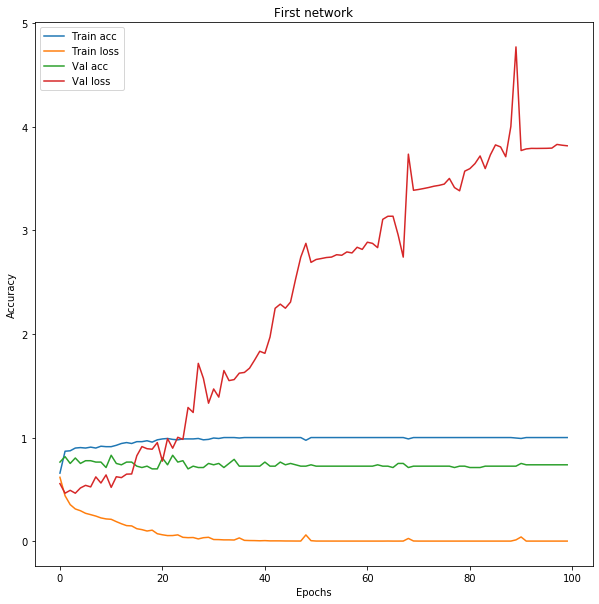

In [9]:
plt.figure(figsize = (10,10))
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_accuracy'])
plt.plot(h1.history['val_loss'])
plt.title('First network')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train acc', 'Train loss', 'Val acc', 'Val loss'], loc='upper left')

# 2nd Experiment

*For the second architecture, we used 1 less hidden layer than the previous one and a batch size of 16 instead of 32. Same number of training and validation samples were used.*

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [11]:
h2 = model.fit(data, labels, batch_size = 16, epochs = 100, validation_split = 0.25)

Train on 227 samples, validate on 76 samples
Epoch 1/100
227/227 [==============================] - 1s 5ms/sample - loss: 0.5683 - accuracy: 0.7621 - val_loss: 0.5253 - val_accuracy: 0.7368
Epoch 2/100
227/227 [==============================] - 0s 268us/sample - loss: 0.4038 - accuracy: 0.8546 - val_loss: 0.4957 - val_accuracy: 0.7237
Epoch 3/100
227/227 [==============================] - 0s 255us/sample - loss: 0.3396 - accuracy: 0.8634 - val_loss: 0.4648 - val_accuracy: 0.7632
Epoch 4/100
227/227 [==============================] - 0s 259us/sample - loss: 0.3097 - accuracy: 0.8722 - val_loss: 0.4954 - val_accuracy: 0.7500
Epoch 5/100
227/227 [==============================] - 0s 255us/sample - loss: 0.2866 - accuracy: 0.8855 - val_loss: 0.5114 - val_accuracy: 0.7500
Epoch 6/100
227/227 [==============================] - 0s 255us/sample - loss: 0.2689 - accuracy: 0.8811 - val_loss: 0.4926 - val_accuracy: 0.7368
Epoch 7/100
227/227 [==============================] - 0s 272us/sample - lo

*This network is clearly overtrained as well. We can see that with increasing number of epochs we get worse validation loss and accuracy.*

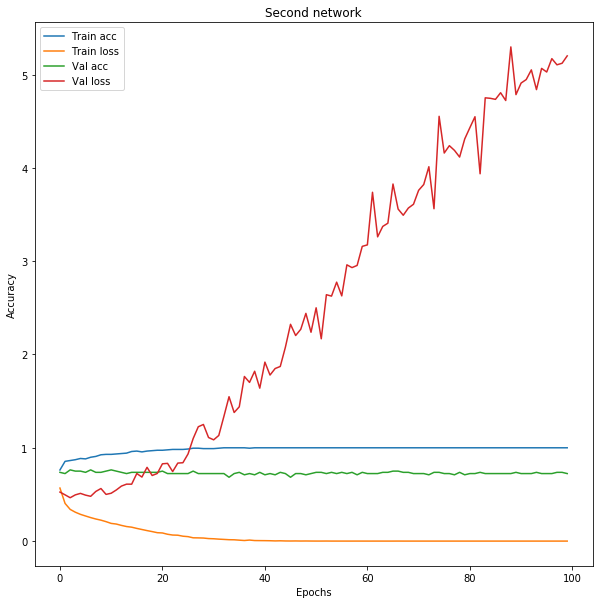

In [12]:
plt.figure(figsize = (10,10))
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_accuracy'])
plt.plot(h2.history['val_loss'])
plt.title('Second network')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train acc', 'Train loss', 'Val acc', 'Val loss'], loc='upper left')

# 3rd Experiment

*In a similar fashion, we used 1 less layer compared to the previous one. We also picked 8 as our batch size and only trained for 50 epochs. However, this time we picked 242 samples for training and only 61 for validation.* 

In [13]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [14]:
h3 = model.fit(data, labels, batch_size= 8, epochs= 50, validation_split = 0.2)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 1s 3ms/sample - loss: 0.6084 - accuracy: 0.6612 - val_loss: 0.5544 - val_accuracy: 0.7049
Epoch 2/50
242/242 [==============================] - 0s 235us/sample - loss: 0.4294 - accuracy: 0.8306 - val_loss: 0.5240 - val_accuracy: 0.7213
Epoch 3/50
242/242 [==============================] - 0s 231us/sample - loss: 0.3626 - accuracy: 0.8471 - val_loss: 0.5298 - val_accuracy: 0.7705
Epoch 4/50
242/242 [==============================] - 0s 239us/sample - loss: 0.3298 - accuracy: 0.8636 - val_loss: 0.5440 - val_accuracy: 0.7705
Epoch 5/50
242/242 [==============================] - 0s 247us/sample - loss: 0.3113 - accuracy: 0.8719 - val_loss: 0.5403 - val_accuracy: 0.8033
Epoch 6/50
242/242 [==============================] - 0s 251us/sample - loss: 0.2927 - accuracy: 0.8843 - val_loss: 0.5639 - val_accuracy: 0.7869
Epoch 7/50
242/242 [==============================] - 0s 247us/sample - loss: 0.2

*As can be seen from the figure, although the architecture does well on the training set, it performs bad on the validation set.*

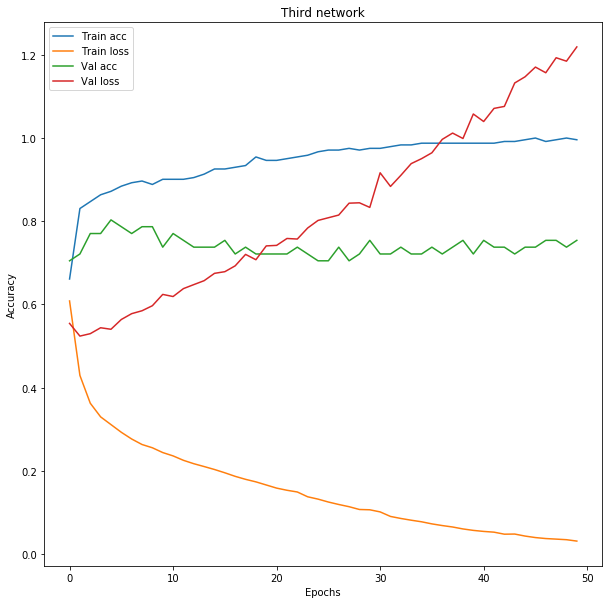

In [15]:
plt.figure(figsize = (10,10))
plt.plot(h3.history['accuracy'])
plt.plot(h3.history['loss'])
plt.plot(h3.history['val_accuracy'])
plt.plot(h3.history['val_loss'])
plt.title('Third network')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train acc', 'Train loss', 'Val acc', 'Val loss'], loc='upper left')

# 4th Experiment

*This time we only used 3 hidden layers with adam as the optimizer. We picked batch size of 4 and 227 training samples and 76 validation samples.*

In [16]:
model = Sequential()
model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [17]:
h4 = model.fit(data, labels, batch_size= 4, epochs= 50, validation_split= 0.25)

Train on 227 samples, validate on 76 samples
Epoch 1/50
227/227 [==============================] - 1s 3ms/sample - loss: 0.7700 - accuracy: 0.4581 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/50
227/227 [==============================] - 0s 387us/sample - loss: 0.6484 - accuracy: 0.5198 - val_loss: 0.6221 - val_accuracy: 0.6184
Epoch 3/50
227/227 [==============================] - 0s 400us/sample - loss: 0.5691 - accuracy: 0.7313 - val_loss: 0.5661 - val_accuracy: 0.6842
Epoch 4/50
227/227 [==============================] - 0s 448us/sample - loss: 0.5025 - accuracy: 0.8106 - val_loss: 0.5226 - val_accuracy: 0.7105
Epoch 5/50
227/227 [==============================] - 0s 483us/sample - loss: 0.4499 - accuracy: 0.8414 - val_loss: 0.4926 - val_accuracy: 0.7368
Epoch 6/50
227/227 [==============================] - 0s 439us/sample - loss: 0.4091 - accuracy: 0.8414 - val_loss: 0.4754 - val_accuracy: 0.7632
Epoch 7/50
227/227 [==============================] - 0s 400us/sample - loss: 0.3

*We got better results with this architecture. We were able to get 75% accuracy on the validation set.*

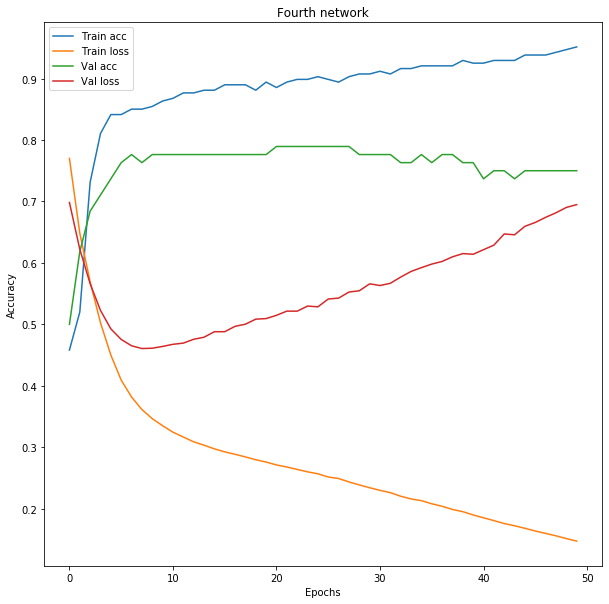

In [18]:
plt.figure(figsize = (10,10))
plt.plot(h4.history['accuracy'])
plt.plot(h4.history['loss'])
plt.plot(h4.history['val_accuracy'])
plt.plot(h4.history['val_loss'])
plt.title('Fourth network')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train acc', 'Train loss', 'Val acc', 'Val loss'], loc='upper left')

# 5th Experiment

*For the final architecture we only had 1 hidden layer with 10 neurons. We used adam as our optimizer and we picked 16 as our batch size, training for 50 epochs on 227 training samples and 76 validation samples.*

In [19]:
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [20]:
h5 = model.fit(data, labels, batch_size= 16, epochs= 50, validation_split= 0.25)

Train on 227 samples, validate on 76 samples
Epoch 1/50
227/227 [==============================] - 1s 3ms/sample - loss: 0.6770 - accuracy: 0.6123 - val_loss: 0.6487 - val_accuracy: 0.6447
Epoch 2/50
227/227 [==============================] - 0s 162us/sample - loss: 0.6351 - accuracy: 0.6476 - val_loss: 0.6197 - val_accuracy: 0.6711
Epoch 3/50
227/227 [==============================] - 0s 171us/sample - loss: 0.6012 - accuracy: 0.6872 - val_loss: 0.5952 - val_accuracy: 0.7368
Epoch 4/50
227/227 [==============================] - 0s 163us/sample - loss: 0.5715 - accuracy: 0.7093 - val_loss: 0.5741 - val_accuracy: 0.7368
Epoch 5/50
227/227 [==============================] - 0s 171us/sample - loss: 0.5469 - accuracy: 0.7269 - val_loss: 0.5567 - val_accuracy: 0.7500
Epoch 6/50
227/227 [==============================] - 0s 167us/sample - loss: 0.5247 - accuracy: 0.7401 - val_loss: 0.5418 - val_accuracy: 0.7632
Epoch 7/50
227/227 [==============================] - 0s 167us/sample - loss: 0.5

*This was by far the simplest and most accurate network. We were able to get 80.26% accuracy on the validation set with a very low validation loss.*

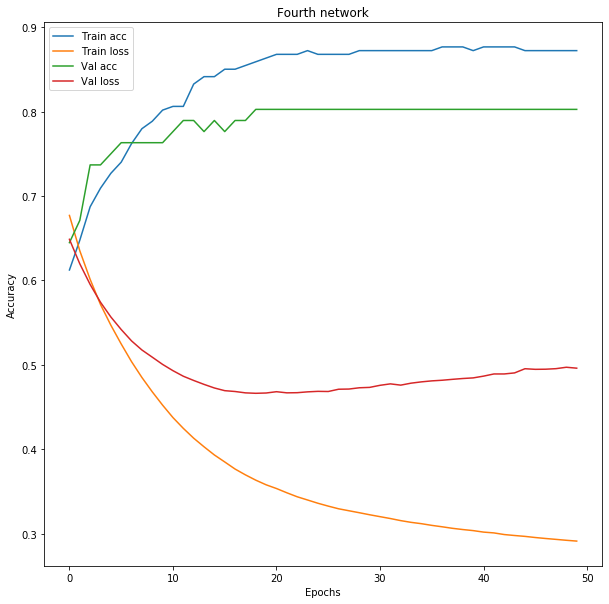

In [21]:
plt.figure(figsize = (10,10))
plt.plot(h5.history['accuracy'])
plt.plot(h5.history['loss'])
plt.plot(h5.history['val_accuracy'])
plt.plot(h5.history['val_loss'])
plt.title('Fourth network')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train acc', 'Train loss', 'Val acc', 'Val loss'], loc='upper left')

# A Step Further

*We took our experiment a step further by combining (merging) the cleveland, hungarian and switzerland dataset so we would have more observations to make our datset more robust. Instead of replacing missing values with zeroes, we decided to replace them with the mean.*

In [22]:
filename1 = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df1 = pd.read_csv(filename1,
                index_col = None,
                header = None,
                na_values = '?')
df1.fillna(df1.mean(), inplace = True)

filename2 = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
df2 = pd.read_csv(filename2,
                index_col = None,
                header = None,
                na_values = '?')
df2.fillna(df2.mean(), inplace = True)

filename3 = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
df3 = pd.read_csv(filename3,
                index_col = None,
                header = None,
                na_values = '?')
df3.fillna(df3.mean(), inplace = True)

scalar_d = preprocessing.StandardScaler()

data1 = df1.loc[:,0:12]
labels1 = 1.0*(df1.loc[:, 13] > 0)

data2 = df2.loc[:,0:12]
labels2 = df2.loc[:, 13]

data3 = df3.loc[:,0:12]
labels3 = 1.0*(df3.loc[:, 13] > 0)

scalar_df1 = pd.DataFrame(scalar_d.fit_transform(data1))
scalar_df2 = pd.DataFrame(scalar_d.fit_transform(data2))
scalar_df3 = pd.DataFrame(scalar_d.fit_transform(data3))

data_merge = scalar_df1.append(scalar_df2, ignore_index=True)
data_merged = np.asarray(data_merge.append(scalar_df3, ignore_index=True))

labels_merge = labels1.append(labels2, ignore_index=True)
labels_merged = np.asarray(labels_merge.append(labels3, ignore_index=True))


*Since we had a larger number of observations, we had enough samples to split our dataset into training and test set. We used Scikit-Learn's train_test_split method to have 20% of the samples as the test set.*

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_merged, labels_merged, test_size=0.2, random_state=42)


In [24]:
model = Sequential()

model.add(Dense(10, activation='relu', input_shape = (13,))) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [25]:
h6 = model.fit(X_train, y_train, batch_size = 16, epochs= 50, validation_split = 0.25)

Train on 432 samples, validate on 144 samples
Epoch 1/50
432/432 [==============================] - 1s 2ms/sample - loss: 0.6766 - accuracy: 0.6088 - val_loss: 0.6613 - val_accuracy: 0.6875
Epoch 2/50
432/432 [==============================] - 0s 134us/sample - loss: 0.6639 - accuracy: 0.6574 - val_loss: 0.6518 - val_accuracy: 0.6944
Epoch 3/50
432/432 [==============================] - 0s 132us/sample - loss: 0.6517 - accuracy: 0.6898 - val_loss: 0.6392 - val_accuracy: 0.7569
Epoch 4/50
432/432 [==============================] - 0s 129us/sample - loss: 0.6394 - accuracy: 0.7199 - val_loss: 0.6296 - val_accuracy: 0.7639
Epoch 5/50
432/432 [==============================] - 0s 118us/sample - loss: 0.6290 - accuracy: 0.7222 - val_loss: 0.6206 - val_accuracy: 0.7778
Epoch 6/50
432/432 [==============================] - 0s 120us/sample - loss: 0.6191 - accuracy: 0.7407 - val_loss: 0.6137 - val_accuracy: 0.7708
Epoch 7/50
432/432 [==============================] - 0s 113us/sample - loss: 0.

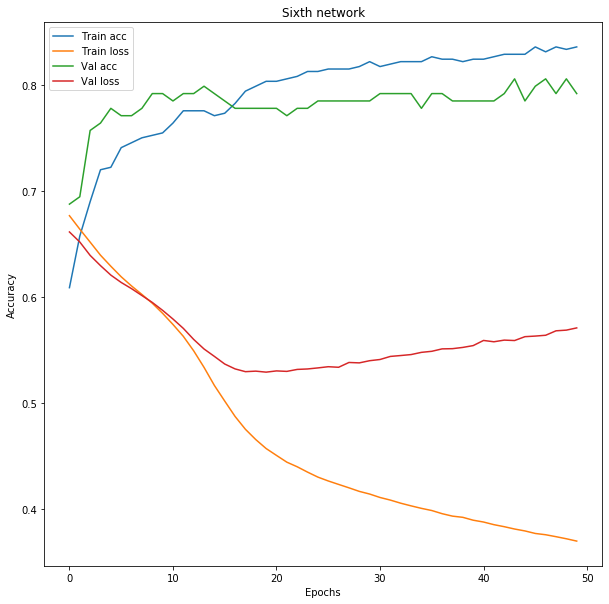

In [26]:
plt.figure(figsize = (10,10))
plt.plot(h6.history['accuracy'])
plt.plot(h6.history['loss'])
plt.plot(h6.history['val_accuracy'])
plt.plot(h6.history['val_loss'])
plt.title('Sixth network')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train acc', 'Train loss', 'Val acc', 'Val loss'], loc='upper left')

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=16, verbose=0)
print(test_loss, test_acc)

0.4945906566249 0.7916667


*We achieved a test accuracy of 79.17% with the combined dataset.*

# Conclusion

## For this simple task of binary classification with very few samples on our dataset, we realized that a simple neural network architecture with only 1 layer was the simplest and most optimal. 